In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia/train"

In [ ]:
test_dir = "/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia/test"

In [ ]:
train_data = ImageDataGenerator().flow_from_directory(train_dir,(150,150),batch_size=5,shuffle=False)

Found 5216 images belonging to 2 classes.


In [ ]:
test_data = ImageDataGenerator().flow_from_directory(test_dir,(150,150),batch_size=5,shuffle=False)

Found 624 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

need to throw away small numbers

In [ ]:
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

In [ ]:
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

In [ ]:
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

# vit 64

In [ ]:
model.add(Flatten())

NameError: ignored

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 36, 36, 32)       

In [ ]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

In [ ]:
model.add(Dense(2,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 36, 36, 32)       

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
h = model.fit(train_data,batch_size=5,epochs=5)

Epoch 1/5
1044/1044 [==============================] - 2628s 3s/step - loss: 0.5860 - accuracy: 0.7297
Epoch 2/5
1044/1044 [==============================] - 219s 210ms/step - loss: 0.5710 - accuracy: 0.7429
Epoch 3/5
1044/1044 [==============================] - 225s 216ms/step - loss: 0.5706 - accuracy: 0.7429
Epoch 4/5
1044/1044 [==============================] - 218s 208ms/step - loss: 0.5706 - accuracy: 0.7429
Epoch 5/5
1044/1044 [==============================] - 221s 211ms/step - loss: 0.5705 - accuracy: 0.7429


In [ ]:
import matplotlib.pyplot as plt


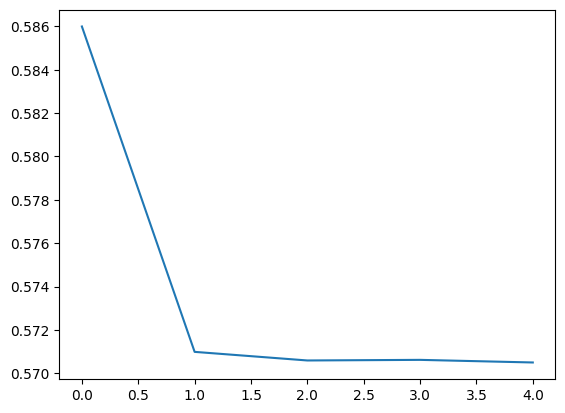

In [ ]:
plt.plot(h.history["loss"])

In [ ]:
model.evaluate(test_data)

RuntimeError: ignored

In [ ]:
pred = model.predict(test_data)

125/125 [==============================] - 238s 2s/step


In [ ]:
pred

In [ ]:
import numpy as np
pred = np.argmax(pred,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(test_data.classes,pred)

In [ ]:
cm